Saving Plot Image at Checkpoint: 0.0 s
Saving Plot Image at Checkpoint: 0.001 s
Saving Plot Image at Checkpoint: 0.002 s
Saving Plot Image at Checkpoint: 0.003 s
Saving Plot Image at Checkpoint: 0.004 s
Saving Plot Image at Checkpoint: 0.005 s
Saving Plot Image at Checkpoint: 0.006 s
Saving Plot Image at Checkpoint: 0.007 s
Saving Plot Image at Checkpoint: 0.008 s
Saving Plot Image at Checkpoint: 0.009000000000000001 s
Saving Plot Image at Checkpoint: 0.01 s

Time Elapsed: 0.01 s


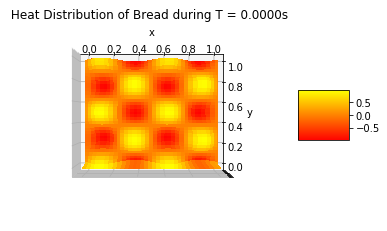

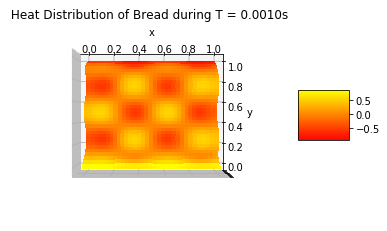

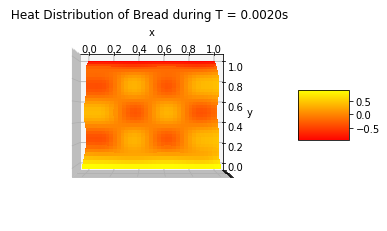

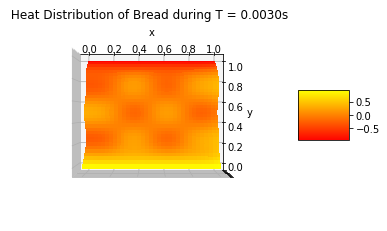

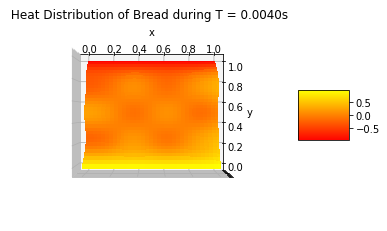

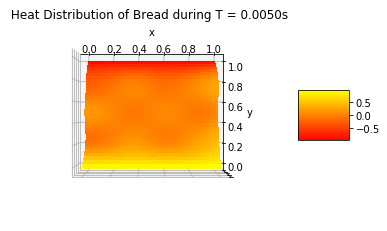

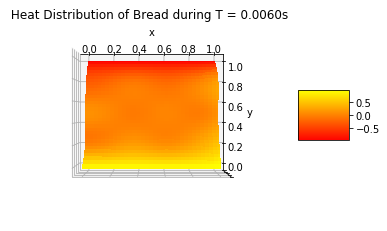

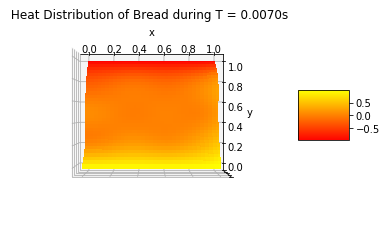

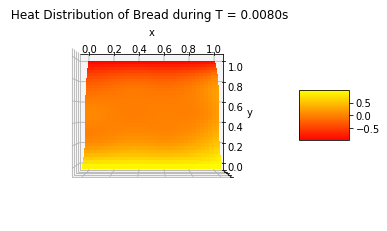

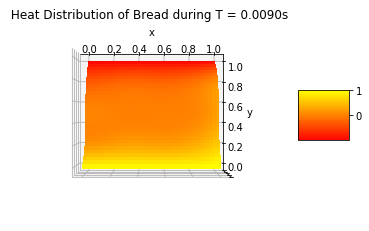

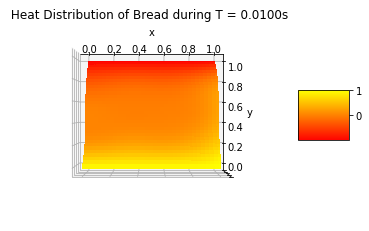

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.ticker import LinearLocator
from tqdm.notebook import tqdm


class Bread:

    """
    
    The following class are methods used
    to model the 2-D Heating PDE about its x and y dimension.

    T(x,y,t) - Temperature given x,y, time where x <= 1, y <= 1 and t>=0 

    PDE: dT/dt = α (d^2T/ dx^2 + d^2T/ dy^2)

    """

    def __init__(self, 
                 X,
                 Y,
                 name,
                 alpha=1.0,
                 ):
        
        self.X = X
        self.Y = Y
        self.alpha = alpha
        self.name = name

        # TBD
        self.T_map = []
        self.dx = 0
        self.dy = 0
        self.dt = 0
        self.cool_time = 0 #s

    def solve(self, dx, dy, dt, save_every, cool_time=10):
        
        self.dx = dx
        self.dy = dy
        self.dt = dt
        self.cool_time = cool_time
        
        x_ = np.linspace(0, self.X, round(self.X/dx)+1)
        y_ = np.linspace(0, self.Y, round(self.Y/dy)+1)
        X_, Y_ = np.meshgrid(x_ , y_);
        
        # Multiply
        T_cur = np.sin(4*np.pi*X_) * np.cos(4*np.pi*Y_)
        
        # Dirichlet Boundary Conditions
        BC1 = 1   # T(x,y=0,t)
        BC2 = -1  # T(x,y=1,t)
        
        # Index as T[y][x] 
        T_cur[0][:] = BC1
        T_cur[-1][:] = BC2
        
        T_old = T_cur.copy()
            
        for t in tqdm(range(round(cool_time/dt)+1)):

            for y in range(1,len(y_)-1):
                
                for x in range(1,len(x_)-1):

                    # Explicit Time Advancement
                    a =  ( T_old[y][x+1] - 2*T_old[y][x] + T_old[y][x-1] ) / (dx*dx)
                    b =  ( T_old[y+1][x] - 2*T_old[y][x] + T_old[y-1][x] ) / (dy*dy)

                    T_cur[y][x] = (dt*(a+b)) + T_old[y][x];
                    
                    # Neuman Boundary Conditions
                    
                    # x = 0 -> T[y][x+1] = T[y][x-1]
                    c =  ( 2*T_old[y][1] - 2*T_old[y][0]) / (dx*dx)
                    T_cur[y][0] = (dt*(c+b)) + T_old[y][0];
                    
                    # x = 1 -> T[y][x+1] = 4*dx + T[y][x-1]
                    d = ( 2*T_old[y][-2] - 2*T_old[y][-1] + 4*dx ) / (dx*dx)
                    T_cur[y][-1] = (dt*(d+b)) + T_old[y][-1];
                
            T_old = T_cur

            # Save Plot 
            if (t % round(save_every/dt) == 0):
                
                print("Saving Plot Image at Checkpoint: {} s".format(t* dt))
                self.save_plot(X_, Y_, T_cur, t)

        print("Time Elapsed: {} s".format(self.cool_time))       
    
    def save_plot(self, X_, Y_, T_cur, t):
        
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        surf = ax.plot_surface(X_, Y_, T_cur, cmap=cm.autumn,
                               linewidth=0, antialiased=False)

        fig.colorbar(surf, shrink=0.5, aspect=1)
        ax.set_xlabel('x'); 
        ax.set_ylabel('y');
        ax.set_zticklabels([])
        ax.view_init(azim=270, elev=90)         
        ax.set_title(" Heat Distribution of {} during T = {:.4f}s".format(self.name, t*self.dt))
        file_name = 'imgs/bread_2/{}_{}_heat_plot.jpg'.format(self.name.replace(" ", "_"), str(t))
        plt.savefig(file_name, dpi=200)
        
        
def main():

    bread = Bread(X=1, Y=1, name="Bread")
    bread.solve(dx=0.01, dy=0.01, dt=0.00002, save_every=.001, cool_time=0.01)

if __name__ == "__main__":
     main()

In [ ]:
T